1. Import Necessary Libraries and Clean Data

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example CSV file: Replace 'ecommerce_data.csv' with your actual file name
data = pd.read_csv('data/data.csv')

# Rename columns to match the variables in the code (if necessary)
data.rename(columns={
    'Storage ': 'storage',
    'RAM ': 'ram',
    'Screen Size (inches)': 'screen_size',
    'Camera (MP)': 'camera',
    'Battery Capacity (mAh)': 'battery_capacity',
    'Price ($)': 'price'
}, inplace=True)

# Display first few rows for verification
print(data.head())


     Brand              Model storage    ram screen_size              camera  \
0    Apple      iPhone 13 Pro  128 GB   6 GB         6.1        12 + 12 + 12   
1  Samsung   Galaxy S21 Ultra  256 GB  12 GB         6.8  108 + 10 + 10 + 12   
2  OnePlus              9 Pro  128 GB   8 GB         6.7     48 + 50 + 8 + 2   
3   Xiaomi  Redmi Note 10 Pro  128 GB   6 GB        6.67      64 + 8 + 5 + 2   
4   Google            Pixel 6  128 GB   8 GB         6.4           50 + 12.2   

   battery_capacity price  
0              3095   999  
1              5000  1199  
2              4500   899  
3              5020   279  
4              4614   799  


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset (replace with your actual file path)
# data = pd.read_csv('ecommerce_data.csv')

# Cleaning storage and RAM columns
data['storage'] = data['storage'].str.replace('GB', '').str.strip()
data['ram'] = data['ram'].str.replace('GB', '').str.strip()

# Cleaning camera column: Take the first value (primary camera resolution)
data['camera'] = data['camera'].str.split('+').str[0].str.strip()

# Convert price column to numeric (remove '$' if it exists)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Convert battery capacity to numeric
data['battery_capacity'] = pd.to_numeric(data['battery_capacity'], errors='coerce')

# Convert other numeric columns
columns_to_convert = ['storage', 'ram', 'screen_size', 'camera']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values after cleaning
data.dropna(inplace=True)

# Display the cleaned data
print(data.head())


     Brand              Model  storage  ram  screen_size  camera  \
0    Apple      iPhone 13 Pro      128    6         6.10    12.0   
1  Samsung   Galaxy S21 Ultra      256   12         6.80   108.0   
2  OnePlus              9 Pro      128    8         6.70    48.0   
3   Xiaomi  Redmi Note 10 Pro      128    6         6.67    64.0   
4   Google            Pixel 6      128    8         6.40    50.0   

   battery_capacity   price  
0              3095   999.0  
1              5000  1199.0  
2              4500   899.0  
3              5020   279.0  
4              4614   799.0  


2. Correlation Analysis

                     price   storage       ram  screen_size    camera  \
price             1.000000  0.684582  0.576344     0.042938  0.002478   
storage           0.684582  1.000000  0.605839     0.295203  0.251601   
ram               0.576344  0.605839  1.000000     0.382826  0.496295   
screen_size       0.042938  0.295203  0.382826     1.000000  0.502165   
camera            0.002478  0.251601  0.496295     0.502165  1.000000   
battery_capacity -0.371270  0.022407  0.101633     0.735136  0.445267   

                  battery_capacity  
price                    -0.371270  
storage                   0.022407  
ram                       0.101633  
screen_size               0.735136  
camera                    0.445267  
battery_capacity          1.000000  


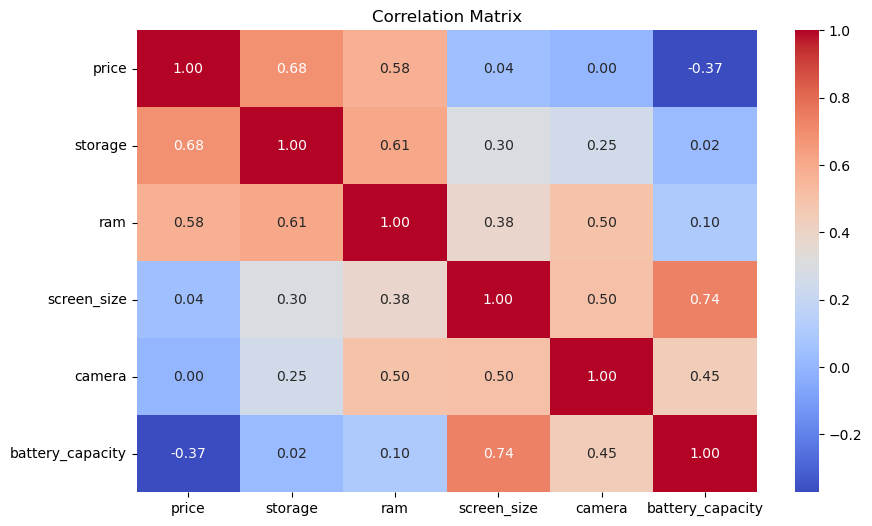

In [13]:
# Correlation matrix
correlation = data[['price', 'storage', 'ram', 'screen_size', 'camera', 'battery_capacity']].corr()
print(correlation)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Feature Engineering

In [16]:
# Adding new features
data['price_per_gb'] = data['price'] / data['storage']
data['price_per_mah'] = data['price'] / data['battery_capacity']

# Brand-level statistics
brand_summary = data.groupby('Brand').agg({
    'price': ['mean', 'max', 'min'],
    'storage': 'mean',
    'battery_capacity': 'mean'
}).reset_index()

print(brand_summary)


       Brand       price                    storage battery_capacity
                    mean     max    min        mean             mean
0      Apple  743.827586  1299.0  399.0  128.000000      2865.586207
1     Google  699.000000   799.0  499.0  128.000000      3923.166667
2     Huawei  783.166667  1399.0  199.0  218.666667      4161.666667
3   Motorola  240.111111   329.0  199.0   99.555556      4888.888889
4      Nokia  285.666667   499.0  139.0   96.000000      4150.000000
5    OnePlus  638.230769   999.0  299.0  167.384615      4401.923077
6       Oppo  467.000000  1199.0  159.0  145.920000      4491.000000
7     Realme  208.166667   329.0   99.0  109.333333      5250.000000
8    Samsung  587.947368  1399.0  139.0  152.421053      4794.736842
9       Vivo  385.000000  1199.0  139.0  137.600000      4770.000000
10    Xiaomi  287.125000   749.0  119.0  128.000000      5108.437500


Clustering Models

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


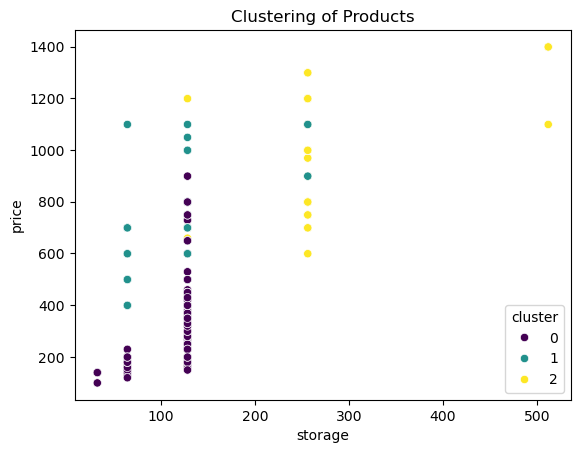

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = data[['price', 'storage', 'ram', 'camera', 'battery_capacity']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(data=data, x='storage', y='price', hue='cluster', palette='viridis')
plt.title('Clustering of Products')
plt.show()


Predictive Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Prepare data
X = data[['storage', 'ram', 'screen_size', 'camera', 'battery_capacity']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 137.28387259168716


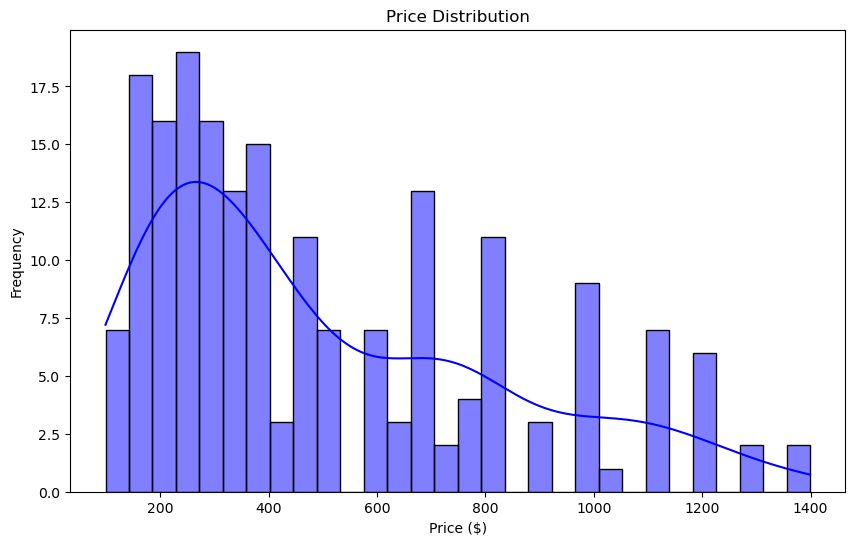

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


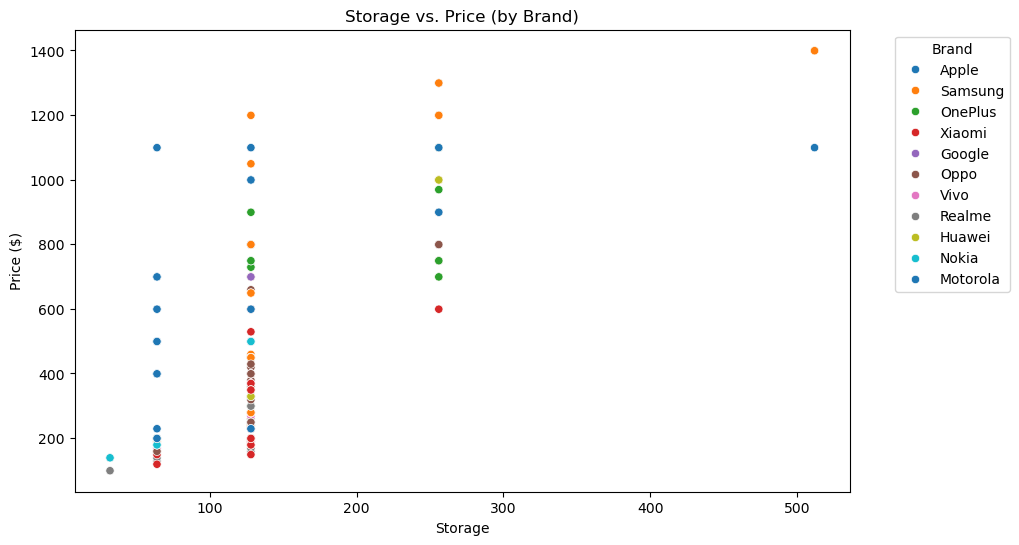

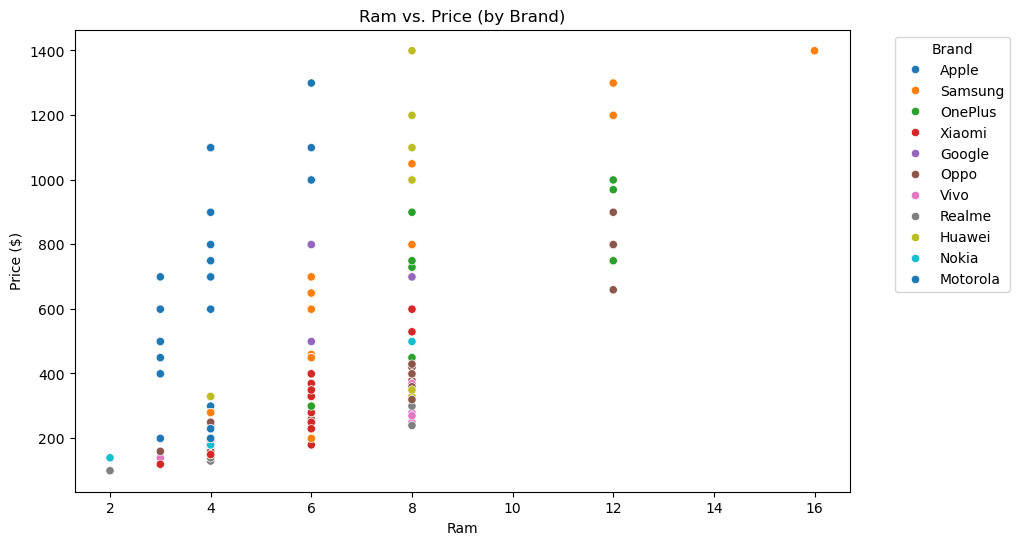

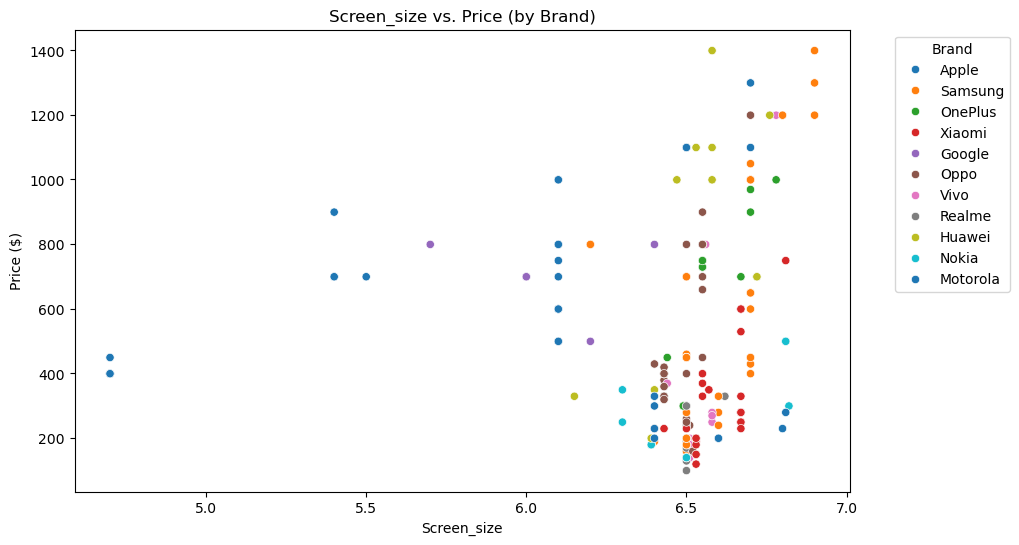

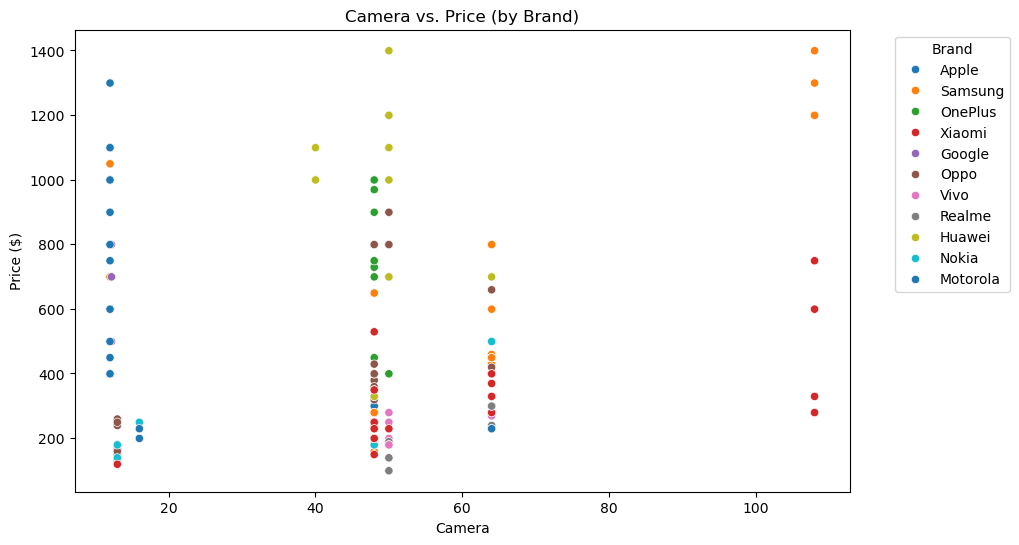

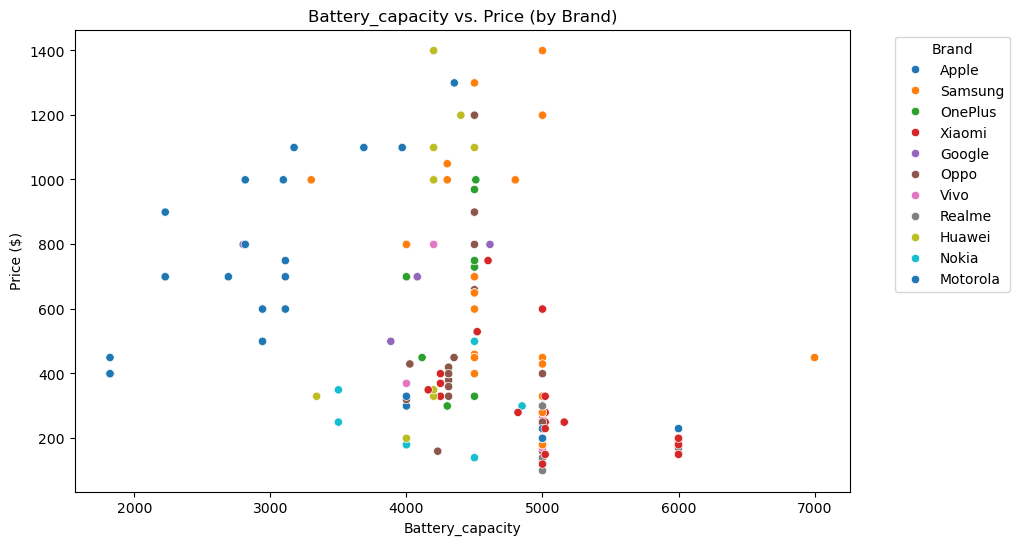

In [33]:
features = ['storage', 'ram', 'screen_size', 'camera', 'battery_capacity']

# Create scatterplots for each feature vs. price, colored by brand
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['price'], hue=data['Brand'], palette='tab10')
    plt.title(f'{feature.capitalize()} vs. Price (by Brand)')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price ($)')
    plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend position
    plt.show()


C:\Users\maste\AppData\Local\Temp\ipykernel_6244\1156278798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


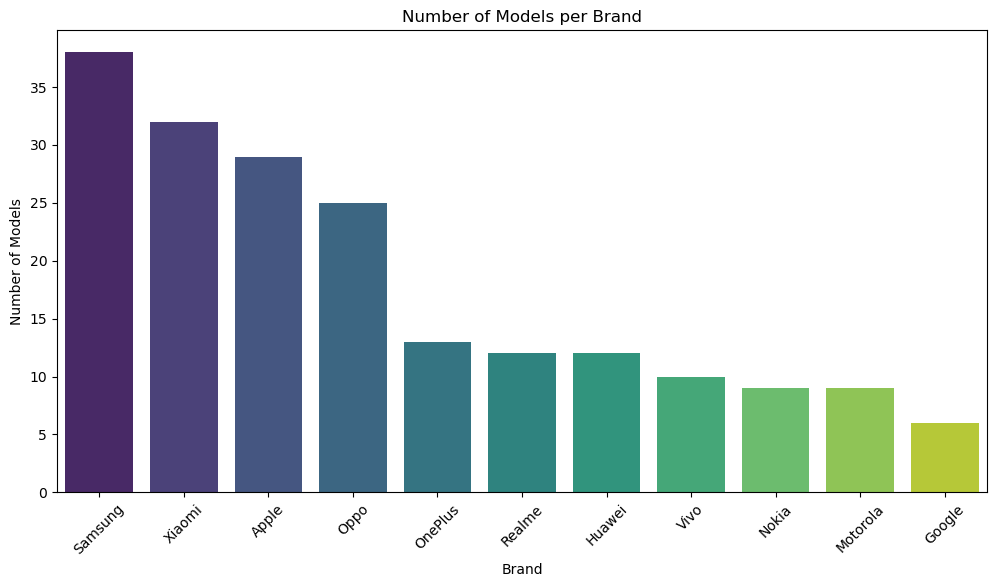

C:\Users\maste\AppData\Local\Temp\ipykernel_6244\1156278798.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_brand.index, y=avg_price_per_brand.values, palette='coolwarm')


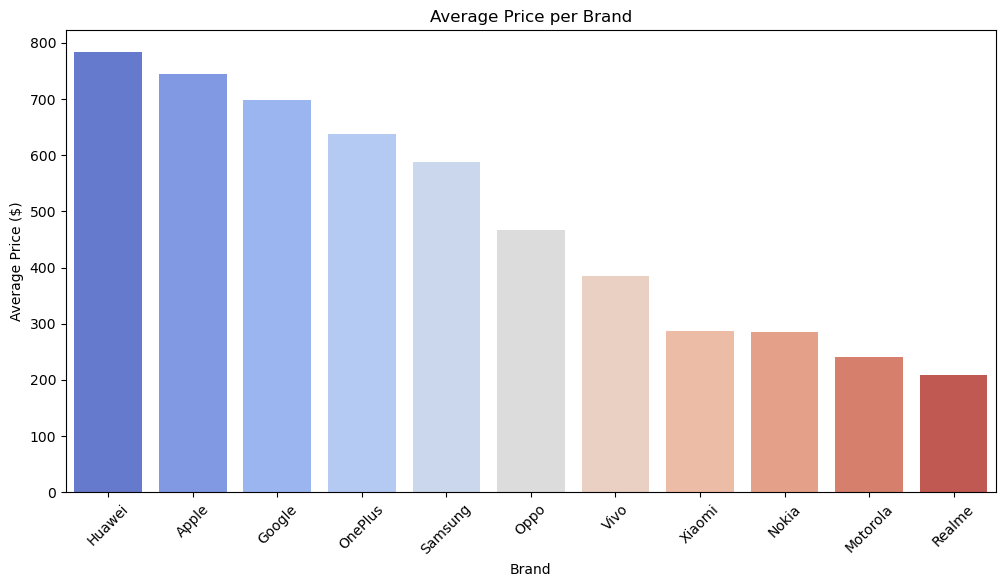

In [31]:
# Number of models per brand
brand_counts = data['Brand'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Number of Models per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()

# Average price per brand
avg_price_per_brand = data.groupby('Brand')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_brand.index, y=avg_price_per_brand.values, palette='coolwarm')
plt.title('Average Price per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()
